Dataset: https://archive.ics.uci.edu/ml/datasets/wine+quality

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [5]:
try:
    red = pd.read_csv('/content/drive/MyDrive/IST347/Project/winequality_red.csv')
except:
    red = pd.read_csv('winequality_red.csv')

In [6]:
try:
    white = pd.read_csv('/content/drive/MyDrive/IST347/Project/winequality_white.csv')
except:
    white = pd.read_csv('winequality_white.csv')

In [7]:
red_col = red.columns.to_list()
white_col = white.columns.to_list()

## Data Understanding

In [8]:
def replace_col():
    '''
    Capitalize column names and remove space to '_', except 'pH' 
    '''
    new_red_col = []
    new_white_col = []
    for r, w in zip(red_col, white_col):

        if r =='pH' or w =='pH':
            new_r = r
            new_w = w
        else:
            new_r = r.title().replace(' ','_')
            new_w = w.title().replace(' ','_')

        new_red_col.append(new_r)
        new_white_col.append(new_w)
    red.columns = new_red_col
    white.columns = new_white_col

# replace column name
replace_col()

In [9]:
def plot_scatter(x_axis,y_axis, h=None):
    '''Plot the scatter plot by input a selected X & Y data'''
    sns.scatterplot(x = x_axis, y = y_axis, hue = h)


In [ ]:
red.head()

,Fixed_Acidity,Volatile_Acidity,Citric_Acid,Residual_Sugar,Chlorides,Free_Sulfur_Dioxide,Total_Sulfur_Dioxide,Density,pH,Sulphates,Alcohol,Quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
red.describe() # maybe we should consider scaling since max/min for free_Sulfer_Dioxide and Total_Sulfer_dioxide have a drastic difference

,Fixed_Acidity,Volatile_Acidity,Citric_Acid,Residual_Sugar,Chlorides,Free_Sulfur_Dioxide,Total_Sulfur_Dioxide,Density,pH,Sulphates,Alcohol,Quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [10]:
red.loc[red.Total_Sulfur_Dioxide>250,'Total_Sulfur_Dioxide'] = red.Total_Sulfur_Dioxide.mean()  #replace outliers with mean
white.loc[(white.Quality ==3) & (white.Total_Sulfur_Dioxide>=300), 'Total_Sulfur_Dioxide'] = white.Total_Sulfur_Dioxide.mean() #replace outliers with mean

Should we consider scaling the df for every algorithm 

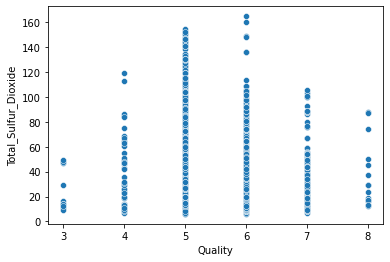

In [ ]:
plot_scatter(red.Quality, red.Total_Sulfur_Dioxide)

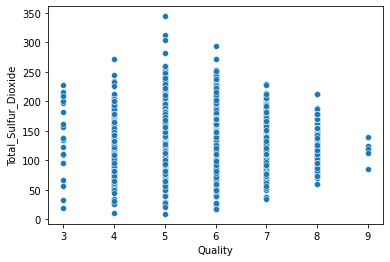

In [ ]:
plot_scatter(white.Quality, white.Total_Sulfur_Dioxide)

In [ ]:
# red wine correlation heatmap
plt.figure(figsize=(8, 6), dpi=80)
sns.heatmap(red.corr(), cmap='coolwarm')

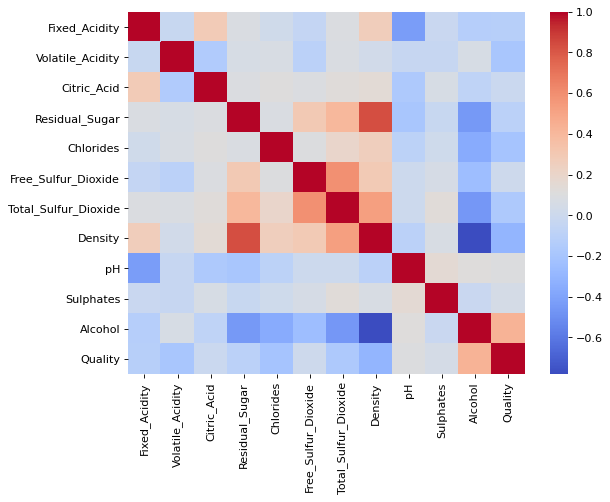

In [12]:
# white wine correlation heatmap
plt.figure(figsize=(8, 6), dpi=80)
sns.heatmap(white.corr(), cmap='coolwarm')

## Algorithm Functions

### Helper Functions

In [13]:
def print_errors(y_test, y_pred):

    '''print all errors by calling this function'''

    from sklearn import metrics
    print(f'Mean Absolute error is: {metrics.mean_absolute_error(y_test, y_pred)}')
    print()
    print(f'Mean Squared error is: {metrics.mean_squared_error(y_test, y_pred)}')
    print()
    print(f'Mean Squared root error is: {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}')
    print()
    print(f'R2 score is : {metrics.r2_score(y_test, y_pred)}')
    print()
    


In [14]:
def print_confusion_metrics(y_test, y_pred):

    '''print confusion metrics/classificaiton report'''

    from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
    
    print()
    print(f'Confusion Metrics:')
    print(confusion_matrix(y_test, y_pred))
    print()
    print(f'Classfication Report:')
    print(classification_report(y_test, y_pred))




In [15]:
def copy_df(df):
    '''create a copy of a dataframe and replace quality to two groups for logistic regression use'''
    df_copy = df.copy()
    # print(df_copy)
    df_copy.loc[df_copy.Quality <=5, 'Quality'] = 0 #not good
    df_copy.loc[df_copy.Quality >5, 'Quality'] = 1 #good


    return df_copy



### Regression

In [ ]:
def multi_regression(X_train, X_test, y_train, y_test, error = False):

    '''everything for multiregression is here, call the function and it will 
        automatically run and print out everything'''

    from sklearn.linear_model import LinearRegression

    lm = LinearRegression()
    lm.fit(X_train, y_train)
    #print(f'Intercept is {lm.intercept_}')
    #print()
    #print(f'Cntercept is {lm.coef_}')
    #print()

    y_pred = lm.predict(X_test)
    y_pred_1 = []
    for x in y_pred:
        x = round(x)
        y_pred_1.append(x)
    plt.scatter(y_test, y_pred_1)
    plt.show()
    error = print_errors(y_test, y_pred_1)

    importance = lm.coef_
    for i,v in enumerate(importance):
        print('Feature: %0d, Score: %.5f' % (i,v))

    plt.bar([x for x in range(len(importance))], importance)
    plt.show()

    return importance

In [ ]:
def ridge(X_train, X_test, y_train, y_test, alpha=1):
    from sklearn.linear_model import Ridge
    from sklearn import metrics

    error = []
    for x in range(1,50):
        test = []
        test_2 = []
        lm_1 = Ridge(alpha = x)
        lm_1.fit(X_train,y_train)
        y_pred = lm_1.predict(X_test)
        for y in y_pred:
            y = round(y)
            test.append(y)
        r = metrics.mean_absolute_error(y_test,y_pred)
        error.append(r)
    plt.plot(range(1,50), error)
    plt.ylabel('Error')
    plt.xlabel('k value')
    plt.show()
    importance = lm_1.coef_
    for i,v in enumerate(importance):
        print('Feature: %0d, Score: %.5f' % (i,v))

    plt.bar([x for x in range(len(importance))], importance)
    plt.show()

    alpha_min = error.index(min(error)) + 1
    print(alpha)

    lm_2 = Ridge(alpha = alpha_min)
    lm_2.fit(X_train,y_train)
    y_pred_2 = lm_2.predict(X_test)
    for y in y_pred_2:
            y = round(y)
            test_2.append(y)
    k = metrics.mean_absolute_error(y_test,test_2)
    print_errors(y_test, test_2)

    return importance

In [ ]:
def LR(df,X_train, X_test, y_train, y_test):

    from sklearn.linear_model import LogisticRegression
    from sklearn import metrics
    from sklearn.metrics import classification_report, confusion_matrix

    new_df = copy_df(df)

    lr = LogisticRegression()
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)

    print_confusion_metrics(y_test, y_pred)

    importance = lr.coef_[0]
    for i,v in enumerate(importance):
	    print('Feature: %0d, Score: %.5f' % (i,v))
     
    plt.bar([x for x in range(len(importance))], importance)
    plt.show()

    return y_pred

### Classification

In [16]:
def KNN(X_train, X_test, y_train, y_test):

    '''take input and run KNN'''

    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.preprocessing import StandardScaler
    from sklearn.metrics import accuracy_score

    #scale dataset
    scaler = StandardScaler()
    scaled_X_train = scaler.fit_transform(X_train)
    scaled_X_test = scaler.transform(X_test)

    #find best K 

    best_k = 0
    accuracy = 0
    scores = []

    for k in range(1,100):
        knn_model = KNeighborsClassifier(n_neighbors = k)
        # print(knn_model)
        knn_model.fit(scaled_X_train, y_train)
        y_pred = knn_model.predict(scaled_X_test)
        score = accuracy_score(y_test, y_pred)
        # print(f'the K right now is {k}, and its score is {score}')
        scores.append(score)

        if score > accuracy:
            best_k = k
            accuracy = score

    print(f'the best K is: {best_k}, and its score is {accuracy}')

    #plot the accuracy
    plt.figure(dpi=100)
    plt.plot(range(1,100), scores, label = 'Accuracy Score')
    plt.legend()
    plt.ylabel('Score')
    plt.xlabel('k value')

    #using best_k for KNN

    best_model = KNeighborsClassifier(n_neighbors = best_k)
    best_model.fit(scaled_X_train, y_train)
    y_pred = best_model.predict(scaled_X_test)

    print()
    print('-------Confusion Metrics Report-------')
    print(f'Accuracy score of the best k is: {accuracy_score(y_test,y_pred)}')

    print_confusion_metrics(y_test, y_pred)

    



In [17]:
def NB(X_train, X_test, y_train, y_test):
    from sklearn.preprocessing import StandardScaler
    from sklearn.naive_bayes import GaussianNB
    from sklearn.metrics import classification_report, confusion_matrix

    scaler = StandardScaler()
    scaled_X_train = scaler.fit_transform(X_train)
    scaled_X_test = scaler.transform(X_test)

    model = GaussianNB()
    clf = model.fit(scaled_X_train, y_train)
    y_pred = clf.predict(scaled_X_test)
    
    print_confusion_metrics(y_test, y_pred)
    

In [18]:
def DT(X_train, X_test, y_train, y_test, print_tree=None):

    from sklearn.tree import DecisionTreeClassifier
    from sklearn.metrics import classification_report, confusion_matrix
    from sklearn.tree import plot_tree
    from sklearn.preprocessing import StandardScaler

    scaler = StandardScaler()
    scaled_X_train = scaler.fit_transform(X_train)
    scaled_X_test = scaler.transform(X_test)

    tree_clf = DecisionTreeClassifier()


    tree_clf.fit(scaled_X_train,y_train)
    pred = tree_clf.predict(scaled_X_test)

    print_confusion_metrics(y_test, pred)
    
    try:
        X = red_X
    except:
        X = white_X

    if print_tree == True:
        plt.figure(figsize = (12,8), dpi = 200)
        plot_tree(tree_clf, feature_names = X.columns, filled = True)
    
    importance = tree_clf.feature_importances_
    for i,v in enumerate(importance):
	    print('Feature: %0d, Score: %.5f' % (i,v))

    plt.bar([x for x in range(len(importance))], importance)
    plt.show()
    # df = pd.DataFrame({'Actual':y_test, 'Predicted': pred})
    # return df

    return importance

In [19]:
def RF(X_train, X_test, y_train, y_test):
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
    from sklearn.preprocessing import StandardScaler

    scaler = StandardScaler()
    scaled_X_train = scaler.fit_transform(X_train)
    scaled_X_test = scaler.transform(X_test)

    model = RandomForestClassifier(n_estimators=400, max_features = 'log2', random_state = 0)
    model.fit(scaled_X_train,y_train)
    pred = model.predict(scaled_X_test)
        
    #classification_report(y_test, pred)
    importance = model.feature_importances_
    print_confusion_metrics(y_test,pred)

    for i,v in enumerate(importance):
	    print('Feature: %0d, Score: %.5f' % (i,v))
     
    plt.bar([x for x in range(len(importance))], importance)
    plt.show()

    return importance

## Red Wine

### Split dataset

In [20]:
# split red wine data
red_X = red.drop(['Quality','Free_Sulfur_Dioxide','Citric_Acid'], axis = 1)
red_y = red.Quality
red_Xtrain,red_Xtest, red_ytrain, red_ytest = train_test_split(red_X,red_y, test_size=0.2, random_state= 101)

### Red Wine Regression

In [ ]:
# Multiregression
# red_a = multi_regression(red_Xtrain,red_Xtest, red_ytrain, red_ytest)
# Ridge regression
# red_b = ridge(red_Xtrain,red_Xtest, red_ytrain, red_ytest)
# Logistic Regression
# LR(red, red_Xtrain,red_Xtest, red_ytrain, red_ytest)

### Red Wine Classification

the best K is: 1, and its score is 0.60625

-------Confusion Metrics Report-------
Accuracy score of the best k is: 0.60625

Confusion Metrics:
[[ 0  1  2  0  0  0]
 [ 0  0 10  4  1  0]
 [ 0  5 91 38  4  0]
 [ 0  1 24 81 13  3]
 [ 0  1  1 15 21  1]
 [ 0  0  0  2  0  1]]

Classfication Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        15
           5       0.71      0.66      0.68       138
           6       0.58      0.66      0.62       122
           7       0.54      0.54      0.54        39
           8       0.20      0.33      0.25         3

    accuracy                           0.61       320
   macro avg       0.34      0.37      0.35       320
weighted avg       0.59      0.61      0.60       320



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


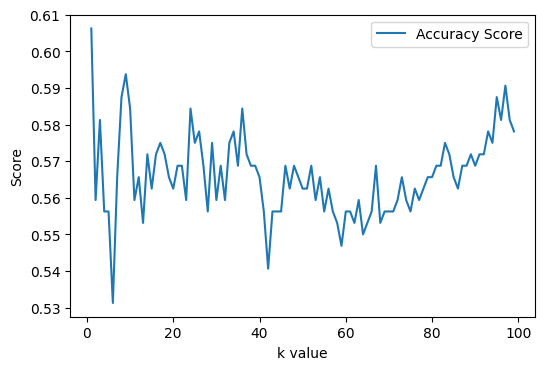

In [ ]:
# KNN
KNN(red_Xtrain,red_Xtest, red_ytrain, red_ytest)

In [ ]:
#Naive Bayes
NB(red_Xtrain,red_Xtest, red_ytrain, red_ytest)


Confusion Metrics:
[[ 0  0  2  1  0  0]
 [ 0  0 10  4  0  1]
 [ 4  4 94 29  7  0]
 [ 0  3 34 59 23  3]
 [ 0  0  1 21 16  1]
 [ 0  0  0  0  3  0]]

Classfication Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        15
           5       0.67      0.68      0.67       138
           6       0.52      0.48      0.50       122
           7       0.33      0.41      0.36        39
           8       0.00      0.00      0.00         3

    accuracy                           0.53       320
   macro avg       0.25      0.26      0.26       320
weighted avg       0.52      0.53      0.53       320




Confusion Metrics:
[[ 0  1  2  0  0  0]
 [ 0  0  8  5  1  1]
 [ 0  3 91 38  6  0]
 [ 0  1 26 83 11  1]
 [ 0  0  4 17 17  1]
 [ 0  0  0  0  2  1]]

Classfication Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        15
           5       0.69      0.66      0.68       138
           6       0.58      0.68      0.63       122
           7       0.46      0.44      0.45        39
           8       0.25      0.33      0.29         3

    accuracy                           0.60       320
   macro avg       0.33      0.35      0.34       320
weighted avg       0.58      0.60      0.59       320

Feature: 0, Score: 0.09715
Feature: 1, Score: 0.12318
Feature: 2, Score: 0.09445
Feature: 3, Score: 0.09618
Feature: 4, Score: 0.11832
Feature: 5, Score: 0.09415
Feature: 6, Score: 0.07826
Feature: 7, Score: 0.14447
Feature: 8, Score: 0.15385


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


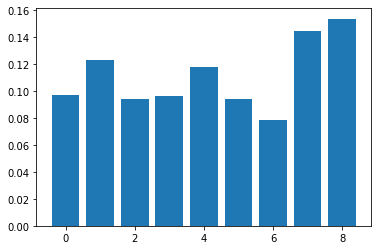

array([0.09714723, 0.12317763, 0.09445159, 0.09617615, 0.11832022,
       0.09415177, 0.07825636, 0.14447249, 0.15384655])

In [ ]:
#Decision Tree, change print tree to True if you want to see the tree!
DT(red_Xtrain,red_Xtest, red_ytrain, red_ytest, print_tree=False);


Confusion Metrics:
[[  0   0   2   1   0   0]
 [  0   0  10   5   0   0]
 [  0   0 106  29   3   0]
 [  0   1  24  92   4   1]
 [  0   0   1  20  17   1]
 [  0   0   0   2   0   1]]

Classfication Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        15
           5       0.74      0.77      0.75       138
           6       0.62      0.75      0.68       122
           7       0.71      0.44      0.54        39
           8       0.33      0.33      0.33         3

    accuracy                           0.68       320
   macro avg       0.40      0.38      0.38       320
weighted avg       0.64      0.68      0.65       320

Feature: 0, Score: 0.09172
Feature: 1, Score: 0.12681
Feature: 2, Score: 0.07942
Feature: 3, Score: 0.09482
Feature: 4, Score: 0.12397
Feature: 5, Score: 0.10422
Feature: 6, Score: 0.08670
Feature: 7, Score: 0.12889
Feature: 8, Score: 0.16346


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


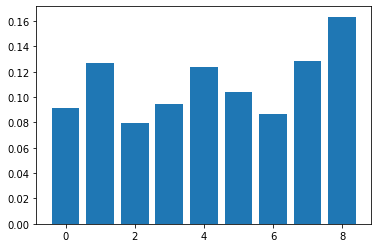

In [21]:
# Random Forest
RF(red_Xtrain,red_Xtest, red_ytrain, red_ytest);

## White Wine

### Split dataset

In [ ]:
# split white wine data
white_X = white.drop(['Quality','Residual_Sugar'], axis = 1)
white_y = white.Quality
white_Xtrain,white_Xtest, white_ytrain, white_ytest = train_test_split(white_X,white_y, test_size=0.2, random_state=101)

### White Wine Regression

In [ ]:
# Multiregression
# white_a = multi_regression(white_Xtrain,white_Xtest, white_ytrain, white_ytest)
# Ridge Regression
# white_b = ridge(white_Xtrain,white_Xtest, white_ytrain, white_ytest)
# Logistic Regression
# white_c = LR(white, white_Xtrain,white_Xtest, white_ytrain, white_ytest)

### White Wine Classification

the best K is: 1, and its score is 0.6408163265306123

-------Confusion Metrics Report-------
Accuracy score of the best k is: 0.6408163265306123

Confusion Metrics:
[[  0   0   3   2   0   0]
 [  1  10  15  13   1   1]
 [  0   8 197  80  19   2]
 [  0   4  84 296  39  10]
 [  0   2   9  36 105   6]
 [  0   0   2   3  12  20]]

Classfication Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.42      0.24      0.31        41
           5       0.64      0.64      0.64       306
           6       0.69      0.68      0.69       433
           7       0.60      0.66      0.63       158
           8       0.51      0.54      0.53        37

    accuracy                           0.64       980
   macro avg       0.47      0.46      0.46       980
weighted avg       0.64      0.64      0.64       980



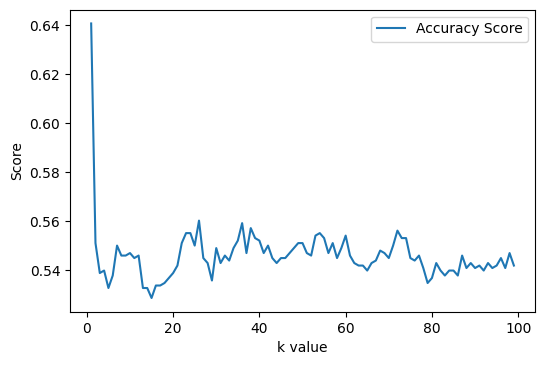

In [ ]:
#KNN
KNN(white_Xtrain,white_Xtest, white_ytrain, white_ytest)

In [ ]:
#Naive Bayes
NB(white_Xtrain,white_Xtest, white_ytrain, white_ytest)


Confusion Metrics:
[[  1   1   1   1   1   0]
 [  2   7  18   9   5   0]
 [  9  16 175  77  28   1]
 [  1  10 112 158 148   4]
 [  0   0  13  37 108   0]
 [  0   0   4   7  25   1]]

Classfication Report:
              precision    recall  f1-score   support

           3       0.08      0.20      0.11         5
           4       0.21      0.17      0.19        41
           5       0.54      0.57      0.56       306
           6       0.55      0.36      0.44       433
           7       0.34      0.68      0.46       158
           8       0.17      0.03      0.05        37

    accuracy                           0.46       980
   macro avg       0.31      0.34      0.30       980
weighted avg       0.48      0.46      0.45       980




Confusion Metrics:
[[  0   0   2   3   0   0]
 [  0  11  17   9   2   2]
 [  0  14 186  88  17   1]
 [  0  11  80 269  56  17]
 [  0   4   8  51  88   7]
 [  0   0   2  10  11  14]]

Classfication Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.28      0.27      0.27        41
           5       0.63      0.61      0.62       306
           6       0.63      0.62      0.62       433
           7       0.51      0.56      0.53       158
           8       0.34      0.38      0.36        37

    accuracy                           0.58       980
   macro avg       0.40      0.41      0.40       980
weighted avg       0.58      0.58      0.58       980

Feature: 0, Score: 0.08172
Feature: 1, Score: 0.10456
Feature: 2, Score: 0.07597
Feature: 3, Score: 0.09176
Feature: 4, Score: 0.09816
Feature: 5, Score: 0.09608
Feature: 6, Score: 0.09882
Feature: 7, Score: 0.11558
Feature: 8, Score: 0.08127
Feature:

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


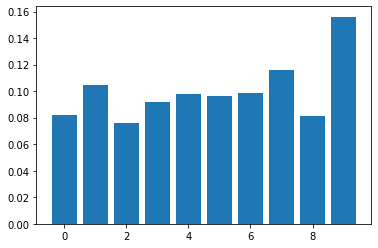

array([0.0817208 , 0.10455767, 0.07596645, 0.09176416, 0.09816002,
       0.09608224, 0.09881523, 0.11558428, 0.08127497, 0.15607416])

In [ ]:
#Decision Tree, change print tree to True if you want to see the tree!
DT(white_Xtrain,white_Xtest, white_ytrain, white_ytest, print_tree=False)


Confusion Metrics:
[[  0   0   3   2   0   0]
 [  0   9  22  10   0   0]
 [  0   2 213  89   2   0]
 [  0   0  62 335  35   1]
 [  0   0   5  60  92   1]
 [  0   0   0  13   9  15]]

Classfication Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.82      0.22      0.35        41
           5       0.70      0.70      0.70       306
           6       0.66      0.77      0.71       433
           7       0.67      0.58      0.62       158
           8       0.88      0.41      0.56        37

    accuracy                           0.68       980
   macro avg       0.62      0.45      0.49       980
weighted avg       0.68      0.68      0.67       980

Feature: 0, Score: 0.08313
Feature: 1, Score: 0.10544
Feature: 2, Score: 0.09054
Feature: 3, Score: 0.09181
Feature: 4, Score: 0.10380
Feature: 5, Score: 0.09991
Feature: 6, Score: 0.11705
Feature: 7, Score: 0.09553
Feature: 8, Score: 0.08865
Feature:

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


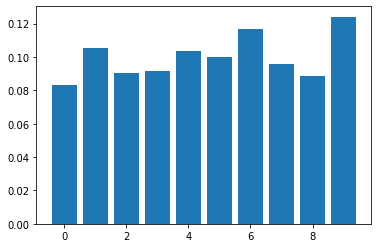

array([0.08313356, 0.10544292, 0.09054282, 0.09181472, 0.1038028 ,
       0.09990938, 0.11704835, 0.09552536, 0.08864745, 0.12413263])

In [ ]:
# Random Forest
RF(white_Xtrain,white_Xtest, white_ytrain, white_ytest);

In [ ]:
# imp_cols = ['Multiregression','Ridge_Regression','Logistic_Regression','Decision_Tree', 'Random_Forest']
# red_imp = [red_a, red_b, red_c, red_d, red_e]
# white_imp = [white_a, white_b, white_c, white_d, white_e]
# all_imp = red_imp + white_imp

In [ ]:
# # red wine importance 
# df_red_imp = pd.DataFrame(data=red_imp).T
# df_red_imp.columns = imp_cols
# df_red_imp.head(10)
##white wine importance
# df_white_imp = pd.DataFrame(data=white_imp).T
# df_white_imp.columns = imp_cols
# df_white_imp.head(10)
##all wine importance
# df_all_imp = pd.concat([df_red_imp, df_white_imp])
# df_all_imp['Wine_category'] = ['Red'] * 10 + ['White']*10 
# df_all_imp